<a href="https://colab.research.google.com/github/inessa3/DMML2020_Tesla/blob/main/1_EDA_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://upload.wikimedia.org/wikipedia/commons/7/77/Logo_HEC_Lausanne.png' width="200">

#Explanation
This is the first notebook of our project. It deals with EDA (explanatory data analysis). The goal was to understand the data we were dealing with. This was also useful for the next notebooks.
Here, we did not make any modification on the data yet, as we wanted to see what the data looks like. To achieve a good understanding, we did the following:
1. We downloaded the datasets from our Github repository. The data comprises of a training set and a test set.
  1. We printed the first 5 rows of the dataset to see how the data is structured. In the training data, there are five features ("id", "keyword", "location", "text", and "target"). In the test data, the "target" feature is missing.
  2. We described the data to see how many observations and features in comprises and of which data types the data consists.
  3. We calculated the base-rate.
2. We visualized the data from the training set in 6 different ways.
  1. First, we displayed which were the most common keywords.
  2. To make the most common keywords easier to grasp, we visualized them as a wordcloud.
  3. We displayed the most common observation in the feature "location". We changed empty cells to 0. This was by far the most common location.
  4. Next, we showed the distribution of fake news vs. real news as a pie chart. As we could see, there are slightly more fake news (57%) than real news.
  5. Afterwards, we showed the 15 most common keywords, given if they were fake or real news. First we showed the 15 most common keywords for fake news.
  6. Then, we showed the 15 most common keywords for fake news.
3. In the last part, we did the same visualizations also for the test set. As the feature "target" does not exist in the training set, we could not show the distribution of fake and real news (visualization 4) and the 15 most common keywords could only be shown for the whole test set (visualization 5 and 6).

###Outlook
Now, we have an understanding of the data. We know  what are the most common observations in the dataset and we know the distribution of the data. Given this knowledge, we will now start cleaning the data, which can be seen in the second notebook. 
After the cleaning, we will make predictions on how the observations in the test data should be classified. To do this, we will try various methods and see which one will yield the highest accuracy. Having calculated the base-rate of the problem (0.5719), we already know the lower benchmark for our predictions. They should at least be as good as the base rate.


#1.Import, Download, Base Rate
1. Importing the necessary libraries
2. Defining the "Color" class in order to highlight some important responses we could achieve
3. Downloading the training data from our Github repository
4. Describing the training data
5. Calculating the base rate of the training data
6. Downloading the test data from our Github repository
7. Describing the test data

###Import Necessary Libraries


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
import seaborn as sns
sns.set_style("white")

###Define "Color" Class
This helps us to highlight some important responses we could achieve.


In [ ]:
class color:
    YELLOW = '\033[93m'
    BLUE = '\033[94m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    END = '\033[0m'

### Download Training Data
We download it from our Github repository.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/inessa3/DMML2020_Tesla/main/data/training_data.csv")
df.head()

,id,keyword,location,text,target
0,3738,destroyed,USA,Black Eye 9: A space battle occurred at Star O...,0
1,853,bioterror,NaN,#world FedEx no longer to transport bioterror ...,0
2,10540,windstorm,"Palm Beach County, FL",Reality Training: Train falls off elevated tra...,1
3,5988,hazardous,USA,#Taiwan Grace: expect that large rocks trees m...,1
4,6328,hostage,Australia,New ISIS Video: ISIS Threatens to Behead Croat...,1


### Describe Training Data
We describe the observations and features of the training data and examine of which data type the data is.


In [ ]:
print('There are', 
      color.BOLD + color.RED + str(len(df))+' rows' + color.END, 
      'and',
      color.BOLD + color.BLUE + str(len(df.columns))+' columns' + color.END+ '.')

There are 6471 rows and 5 columns.


In [ ]:
df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

### Calculate Base Rate
This will be a benchmark for late predictions. These predictions should be at least as good as the base rate.

In [ ]:
df["target"].value_counts()
print ('The base rate is equal to ' + color.BOLD + color.RED + str(round(df.target.value_counts()[0] / len(df), 4))+ color.END)

The base rate is equal to 0.5719


### Download Test Data
We download it from our Github repository.

In [ ]:
df_test_data = pd.read_csv("https://raw.githubusercontent.com/inessa3/DMML2020_Tesla/main/data/test_data.csv")
df_test_data.head()

,id,keyword,location,text
0,9972,tsunami,NaN,Crptotech tsunami and banks.\n http://t.co/KHz...
1,9865,traumatised,"Portsmouth, UK",I'm that traumatised that I can't even spell p...
2,1937,burning%20buildings,NaN,@foxnewsvideo @AIIAmericanGirI @ANHQDC So ... ...
3,3560,desolate,NaN,Me watching Law &amp; Order (IB: @sauldale305)...
4,2731,crushed,bahstun/porta reeko,Papi absolutely crushed that ball


### Describe Test Data
We describe the observations and features of the test data and examine of which data type the data is.

In [ ]:
print('There are', 
      color.BOLD + color.RED + str(len(df_test_data))+' rows' + color.END, 
      'and',
      color.BOLD + color.BLUE + str(len(df_test_data.columns))+' columns' + color.END+ '.')

There are 1142 rows and 4 columns.


In [ ]:
df_test_data.dtypes

id           int64
keyword     object
location    object
text        object
dtype: object

#2.EDA of training data
Visualizations:
1. Top 10 keywords
2. Top 10 keywords as wordcloud
3. Top 10 locations
4. Distributions of real and fake news
5. Top 15 words for fake news
6. Top 15 words for real news

###Visualization 1
Here, we visualize the top 10 keywords:

In [ ]:
print("There are", 
      color.BOLD + color.RED +  str(df['keyword'].unique().shape[0]), color.END+ 
      'different keywords')

There are 222 different keywords


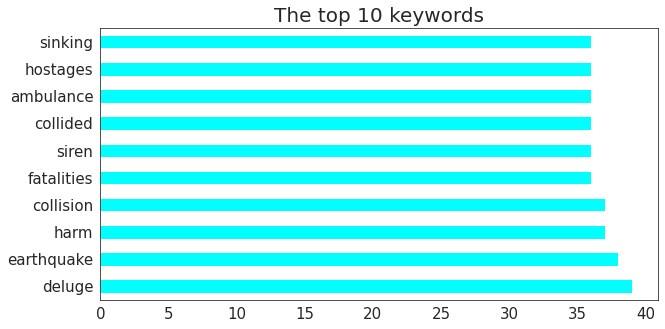

In [ ]:
eda1 = df["keyword"].value_counts()[:10].plot(kind='barh', figsize=(10,5), colormap='cool', title = 'The top 10 keywords', fontsize = 15)
eda1.title.set_size(20)

### Visualization 2
To see better the most common words, we would use the *wordcloud* :

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
keywords=pd.DataFrame()
keywords = df["keyword"].value_counts()[:10]
keywords 

deluge        39
earthquake    38
harm          37
collision     37
fatalities    36
siren         36
collided      36
ambulance     36
hostages      36
sinking       36
Name: keyword, dtype: int64

In [ ]:
#Create and generate a word cloud image:
eda2 = WordCloud(max_font_size=50, max_words=10, background_color="white").generate(str(keywords))

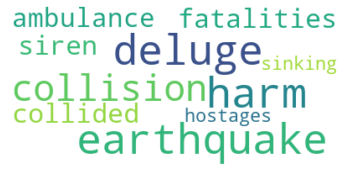

In [ ]:
# Display the generated image:
plt.imshow(eda2, interpolation='bilinear')
plt.axis("off")
plt.show()

###Visualization 3
We visualize the top 10 locations. Yet, we wanted to see if there are any null values, fill them with 0 and see their distribution. 

In [ ]:
df.isnull().sum()

id             0
keyword       55
location    2141
text           0
target         0
dtype: int64

In [ ]:
df.copy
df["location"]=df["location"].fillna(0)

In [ ]:
print("There are", 
      color.BOLD + color.RED +  str(df['location'].unique().shape[0]), color.END+ 
      'different locations')

There are 2922 different locations


In [ ]:
df["location"].value_counts()[:10]

0                  2141
USA                  91
New York             59
United States        46
London               39
Canada               25
UK                   24
Los Angeles, CA      23
Nigeria              22
India                21
Name: location, dtype: int64

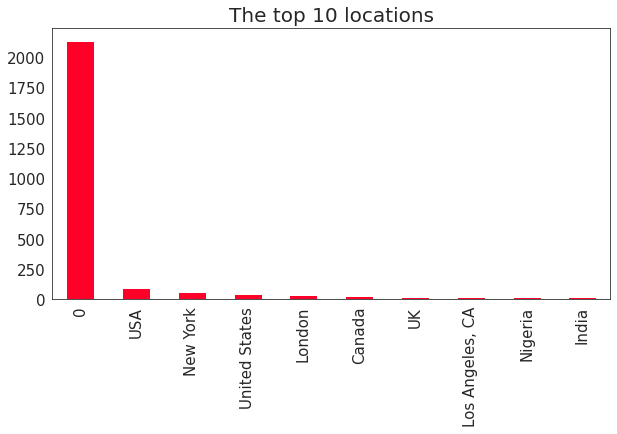

In [ ]:
eda3 = df["location"].value_counts()[:10].plot(kind='bar', figsize=(10,5), colormap='gist_rainbow', title = 'The top 10 locations', fontsize = 15)
eda3.title.set_size(20)

###Visualization 4
With this pie chart we can see the distribution of fake and real news:

In [ ]:
#add colors
colors = ['#acffd9','#8be3ff']

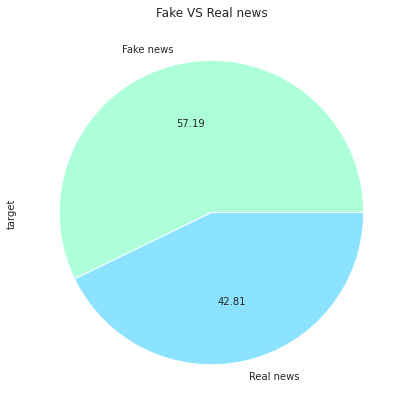

In [ ]:
eda4=df["target"].value_counts()
eda4.plot.pie(labels=['Fake news', 'Real news'], autopct='%.2f', title= "Fake VS Real news", fontsize=10, figsize=(7, 7), colors = colors)

###Visualization 5
Here, we can see the top 15 words for fake news:


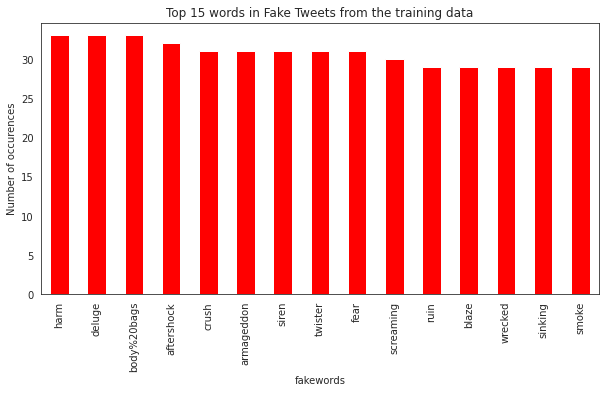

In [ ]:
df_fake_words = df['keyword'].loc[(df['target'] == 0)].value_counts()
df_fake_words_top_15 = df_fake_words[0:15]

df_fake_words_top_15.plot.bar(xlabel = 'fakewords', ylabel = 'Number of occurences', title = 'Top 15 words in Fake Tweets from the training data', legend = False, grid = False, figsize=(10, 5), color = 'RED')

### Visualization 6
Finally, we can see the top 15 words for real news:

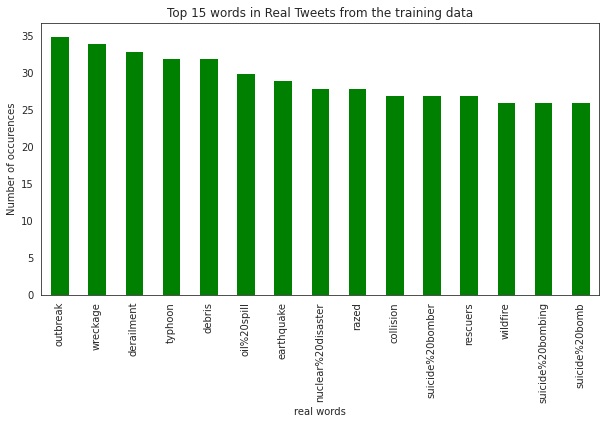

In [ ]:
df_real_words = df['keyword'].loc[(df['target'] == 1)].value_counts()
df_real_words_top_15 = df_real_words[0:15]

df_real_words_top_15.plot.bar(xlabel = 'real words', ylabel = 'Number of occurences', title = 'Top 15 words in Real Tweets from the training data', legend = False, grid = False, figsize=(10, 5), color = 'Green')

#3.EDA of test data
Visualizations:
1. Top 10 keywords
2. Top 10 keywords as wordcloud
3. Top 10 locations
4. Not applicable for test data
5. Not applicable for test data
6. Top 15 words for real news

###Visualization 1
Here, we visualize the top 10 keywords:

In [ ]:
print("There are", 
      color.BOLD + color.RED +  str(df_test_data['keyword'].unique().shape[0]), color.END+ 
      'different keywords')

There are 221 different keywords


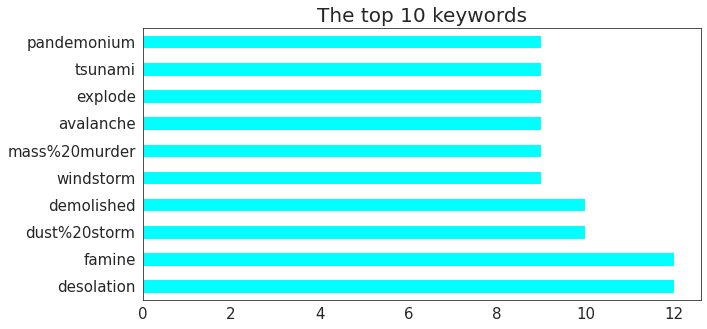

In [ ]:
eda1_testdata = df_test_data["keyword"].value_counts()[:10].plot(kind='barh', figsize=(10,5), colormap='cool', title = 'The top 10 keywords', fontsize = 15)
eda1_testdata.title.set_size(20)

### Visualization 2
To see better the most common words, we would use the *wordcloud* :

In [ ]:
keywords_testdata = pd.DataFrame()
keywords_testdata = df_test_data["keyword"].value_counts()[:10]
keywords_testdata

desolation       12
famine           12
dust%20storm     10
demolished       10
windstorm         9
mass%20murder     9
avalanche         9
explode           9
tsunami           9
pandemonium       9
Name: keyword, dtype: int64

In [ ]:
#Create and generate a word cloud image:
eda2_testdata = WordCloud(max_font_size=50, max_words=10, background_color="white").generate(str(keywords))

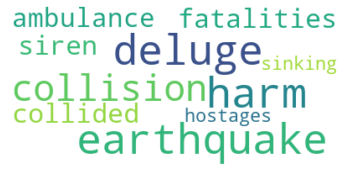

In [ ]:
# Display the generated image:
plt.imshow(eda2, interpolation='bilinear')
plt.axis("off")
plt.show()

###Visualization 3
Here we visualize the top 10 locations. Yet, we noticed that there was a mix of cities and countries. Also, and as there were null values in test data too, this time we dropped them and then we visualized locations by countries.


In [ ]:
df_test_data.isnull().sum()

id            0
keyword       6
location    392
text          0
dtype: int64

In [ ]:
df_test_data.dropna()

,id,keyword,location,text
1,9865,traumatised,"Portsmouth, UK",I'm that traumatised that I can't even spell p...
4,2731,crushed,bahstun/porta reeko,Papi absolutely crushed that ball
6,8676,sinkhole,"San Diego, CA",RT twit_san_diego 'Possible sinkhole disrupts ...
8,2195,catastrophic,"Dublin, Ireland",'Kessler Syndrome' is the name for the catastr...
9,3484,derailed,DC,So a train derailed and instead of me getting ...
...,...,...,...,...
1133,412,apocalypse,Oakland,Julie + R is the apocalypse version of Romeo +...
1134,1556,bomb,Ireland,The crew on #EnolaGay had nuclear bomb on boar...
1135,10430,whirlwind,"pettyville, usa",this week has been a whirlwind but this is ex...
1136,761,avalanche,"London, Kent & SE England.",Beautiful Sweet Avalanche Faith and Akito rose...


In [ ]:
print("There are", 
      color.BOLD + color.RED +  str(df_test_data['location'].unique().shape[0]), color.END+ 
      'different locations')

There are 633 different locations


In [ ]:
df_test_data=df_test_data.copy()

df_test_data['location'].replace({'United States':'USA',
                      
                  'England':'UK','Scotland':'UK', 'Wales':'UK','Birmingham':'UK','Glasgow':'UK',
                  'Liverpool':'UK','Bristol':'UK', 'Manchester':'UK','Sheffield':'UK','Leeds':'UK','Edinburgh':'UK',
                  'Leicester':'UK','Coventry':'UK','Bradford':'UK','Cardiff':'UK','Belfast':'UK','Oxford':'UK','Plymouth':'UK','Aberdeen':'UK', 'Portsmouth, UK':'UK',
                 'London, Kent & SE England.':'UK','Ireland':'UK', 'Dublin, Ireland':'UK','London':'UK',

                  'australia':'Australia','Brisbane':'Australia','Melbourne':'Australia','Sydney':'Australia','Perth':'Australia','Adelaide':'Australia',
                  'Capital\sTerritory':'Australia','Canberra':'Australia','Hobart':'Australia','Darwin':'Australia','Gold\sCoast':'Australia','Queensland':'Australia','Victoria':'Australia','Tasmania':'Australia',

                  'mumbai':'India','Maharashtra':'India','Delhi':'India','Kolkata':'India','West\sBengal':'India','Chennai':'India','Tamil\sNadu':'India','Hyderabad':'India',
                  'Bangalor':'India','Ahmedabad':'India','Surat':'India','Jaipur':'India','Kanpur':'India','Nagpur':'India','Gujarat':'India','Uttar\sPradesh':'India',

                  'Canada':'Canada','Ontario':'Canada','Quebec':'Canada','Nova\sScotia':'Canada','New Brunswick':'Canada','Manitoba':'Canada','British\sColumbia':'Canada',
                  'Prince\sEdward\sIsland':'Canada','Saskatchewan':'Canada','Alberta':'Canada','Newfoundland':'Canada','Labrator':'Canada','Toronto':'Canada','Ottawa':'Canada','Vancouver':'Canada','Calgary':'Canada',
                  'New York':'USA',"Palm Beach County, FL":'USA','New Mexico':'USA','Tennessee':'USA','Virginia':'USA','sFrancisco':'USA',"Los Angeles, CA":'USA',"Washington, DC":'USA',
                  "California":'USA', "Chicago, IL":'USA',"Chicago":'USA',  'Sacramento, CA':'USA',"New York, NY":'USA',"California, USA":'USA',"FLorida":'USA',"San Francisco":'USA',
                   "San Francisco, CA":'USA',  "NYC":'USA',    "Florida":'USA',   "Seattle":'USA', 'Denver, Colorado':'USA',"Nashville, TN":'USA',"Dallas, TX":'USA', "New York City":'USA',
                  "Texas":'USA',"Atlanta, GA":'USA','new%20%york':'USA','San Diego, CA':'USA','pettyville, usa':'USA','DC' :'USA','Oakland':'USA','bahstun/porta reeko':'USA',
                  'Las Vegas, Nevada':'USA','Newcastle':'USA','Portland, OR':'USA',
                  '??????':'Unknown',
                  'Nigeria':'Africa','Kenya':'Africa','Everywhere':'Worldwide','Earth':'Worldwide'}
                   ,inplace=True)

In [ ]:
df_test_data["location"].value_counts()[:10]

USA             78
UK              25
Africa          10
Worldwide        8
Canada           8
India            5
Indonesia        3
Australia        3
South Africa     3
Unknown          3
Name: location, dtype: int64

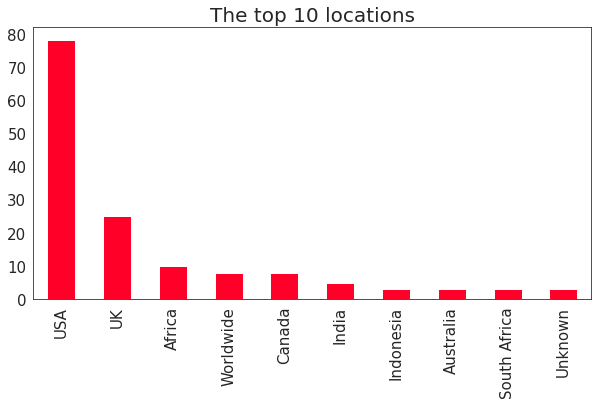

In [ ]:
eda3_testdata = df_test_data["location"].value_counts()[:10].plot(kind='bar', figsize=(10,5), colormap='gist_rainbow', title = 'The top 10 locations', fontsize = 15)
eda3_testdata.title.set_size(20)

###Visualization 4
With this pie chart we saw the distribution of fake and real news for the training data. Obviously, there is no target label in the test set.

###Visualization 5 & 6
Here, we can see the top 15 words in the test data:

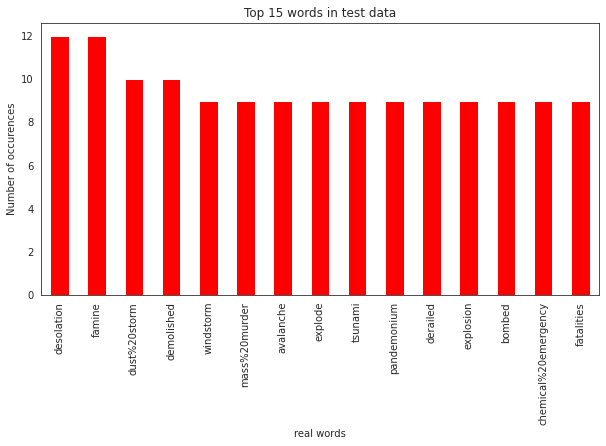

In [ ]:
# Obviously, there are only "real words" in the test data, no "fake words"
df_test_top_words = df_test_data['keyword'].value_counts()
df_test_top_words_15 = df_test_top_words[0:15]

df_test_top_words_15.plot.bar(xlabel = 'real words', ylabel = 'Number of occurences', title = 'Top 15 words in test data', legend = False, grid = False, figsize=(10, 5), color = 'RED')